### CSE 5243 Introduction to Data Mining (AU18)
Updated August 27, 2018, by Michael Burkhardt <burkhardt.5@osu.edu>

# Visualization with Seaborn
In this notebook, we'll learn how to do some basic visualization using
[Seaborn](http://seaborn.pydata.org/), a Python visualization library based on
[Matplotlib](https://matplotlib.org/).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
iris_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv('data/iris.csv', names=iris_columns)

In [3]:
# Seaborn provides an easier way!
iris = sns.load_dataset('iris')

In [4]:
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
106,4.9,2.5,4.5,1.7,virginica
114,5.8,2.8,5.1,2.4,virginica
103,6.3,2.9,5.6,1.8,virginica
64,5.6,2.9,3.6,1.3,versicolor
27,5.2,3.5,1.5,0.2,setosa


In [11]:
df = iris.iloc[:,0:4]

In [12]:
df.sample(3)

,sepal_length,sepal_width,petal_length,petal_width
36,5.5,3.5,1.3,0.2
117,7.7,3.8,6.7,2.2
56,6.3,3.3,4.7,1.6


In [20]:
from sklearn.preprocessing import StandardScaler, scale
ss = StandardScaler()
iris_scaled = ss.fit_transform(df)
iris_scaled2 = scale(df)

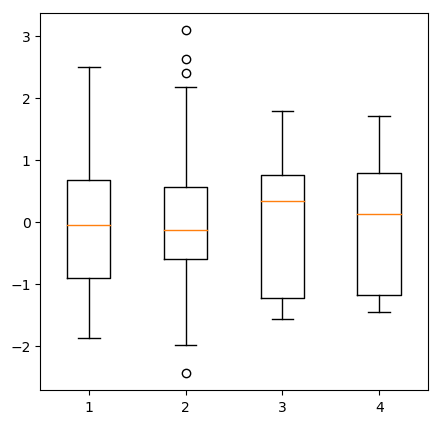

In [21]:
plt.figure(figsize=(5,5), dpi=100)
plt.boxplot(iris_scaled2)
plt.show()

In [18]:
pd.DataFrame(iris_scaled).describe()

,0,1,2,3
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-2.775558e-16,-9.695948e-16,-8.652338e-16,-4.662937e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


## Basic statistics

In [5]:
# The quickest way to get basic statistics for numeric attributes:
# The describe() method gives us count, mean, standard deviation, min, max, median (50th percentile)
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# To get a covariance matrix
iris.cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.042434,1.274315,0.516271
sepal_width,-0.042434,0.189979,-0.329656,-0.121639
petal_length,1.274315,-0.329656,3.116278,1.295609
petal_width,0.516271,-0.121639,1.295609,0.581006


Not terribly helpful, unless we go back and reference the ranges of each variable. Correlation would be easier to digest.

In [7]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


Now, let's plot some stuff

## Histogram

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


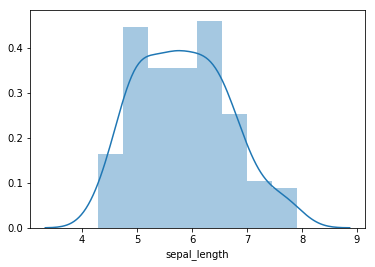

In [8]:
# Basic functionality of Seaborn histogram includes a KDE plot
sns.distplot(a=iris['sepal_length'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


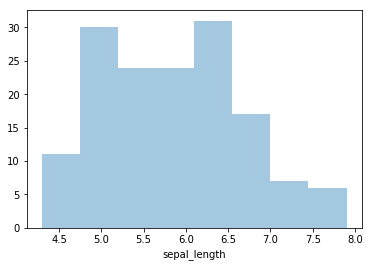

In [9]:
# If you'd like to turn off the KDE...
sns.distplot(a=iris['sepal_length'], kde=False)

In [6]:
# Customize the number of bins
sns.distplot(iris["sepal_length"], )

TypeError: distplot() got an unexpected keyword argument 'binwidth'

## Pareto histogram

In [11]:
# We need a different dataset for this example.
tips = sns.load_dataset("tips")

In [12]:
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size
201,12.74,2.01,Female,Yes,Thur,Lunch,2
24,19.82,3.18,Male,No,Sat,Dinner,2
18,16.97,3.50,Female,No,Sun,Dinner,3
5,25.29,4.71,Male,No,Sun,Dinner,4
70,12.02,1.97,Male,No,Sat,Dinner,2


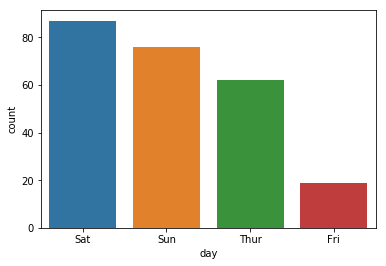

In [13]:
# Get frequencies of each value of 'day'.
# We'll use this to order the categories in the chart.
c = tips['day'].value_counts()
sns.countplot(data=tips, x='day', order=c.index)

## Box plot

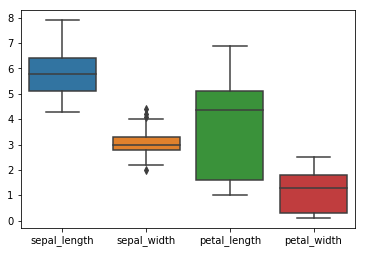

In [14]:
# We can look at the distributions of each variable.
sns.boxplot(data=iris)

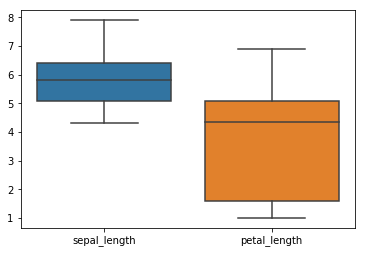

In [15]:
# If we want to limit the variables, we can do so
sns.boxplot(data=iris.iloc[:,[0,2]])

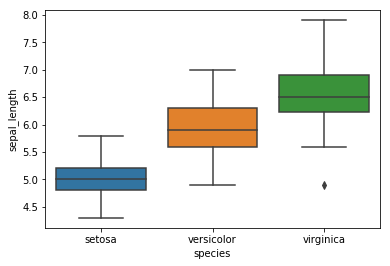

In [16]:
# Let's look at a single variable by species.
sns.boxplot( x=iris["species"], y=iris["sepal_length"] )

For this and other examples, please visit the [Python Graph Gallery](https://python-graph-gallery.com/30-basic-boxplot-with-seaborn/).

## Violin plot

Violin plots are generated in basically the same way as boxplots.

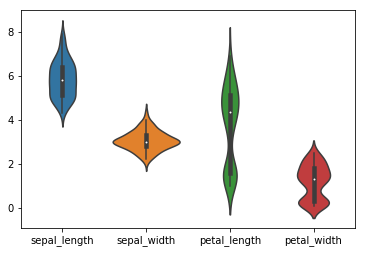

In [17]:
# We can look at the distributions of each variable.
sns.violinplot(data=iris)

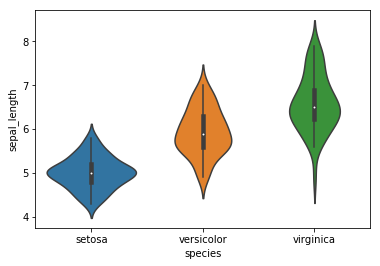

In [18]:
# Let's look at a single variable by species.
sns.violinplot( x=iris["species"], y=iris["sepal_length"] )

## Scatter plot

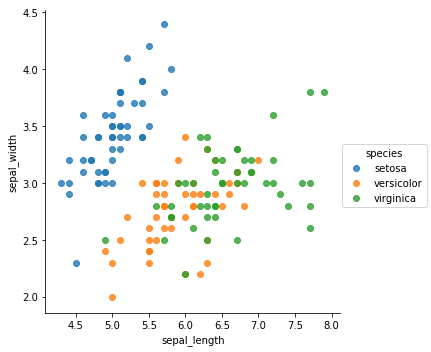

In [19]:
# plot two variables, with each species in a different color
sns.lmplot(data=iris, x="sepal_length", y="sepal_width", fit_reg=False, hue='species')
# Use legend=False to omit the key

## Scatter plot matrix

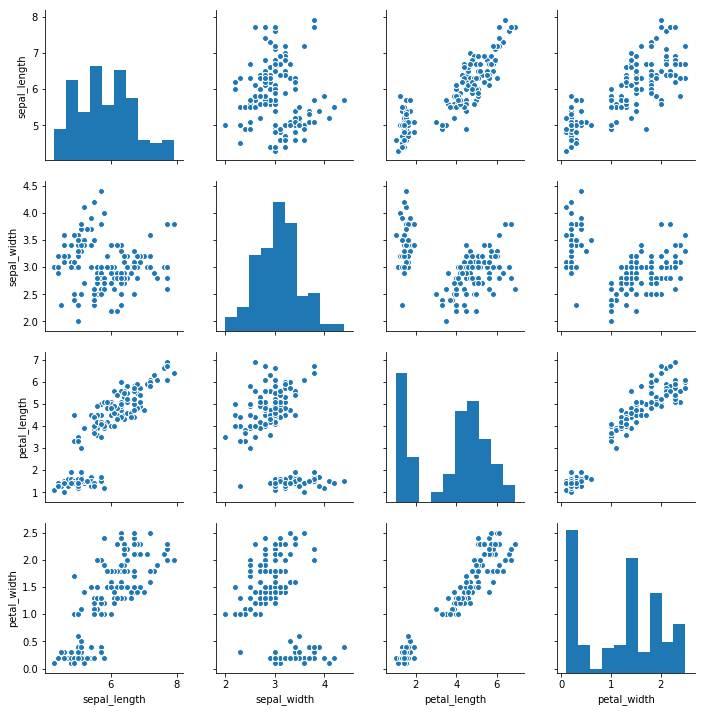

In [20]:
sns.pairplot(iris, kind="scatter")

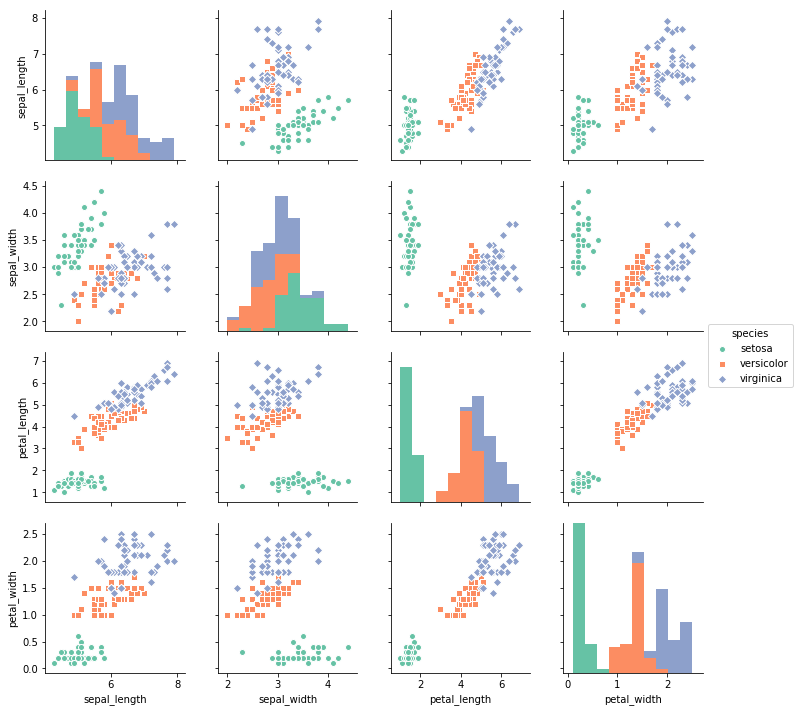

In [21]:
# do some fancy stuff
sns.pairplot(iris, kind="scatter", hue="species", markers=["o", "s", "D"], palette="Set2")

In [22]:
#
import scipy as sp
def corrfunc(x, y, **kws):
    r, _ = sp.stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("{:.2f}".format(r), xy=(.1, .5), xycoords=ax.transAxes, size=50)

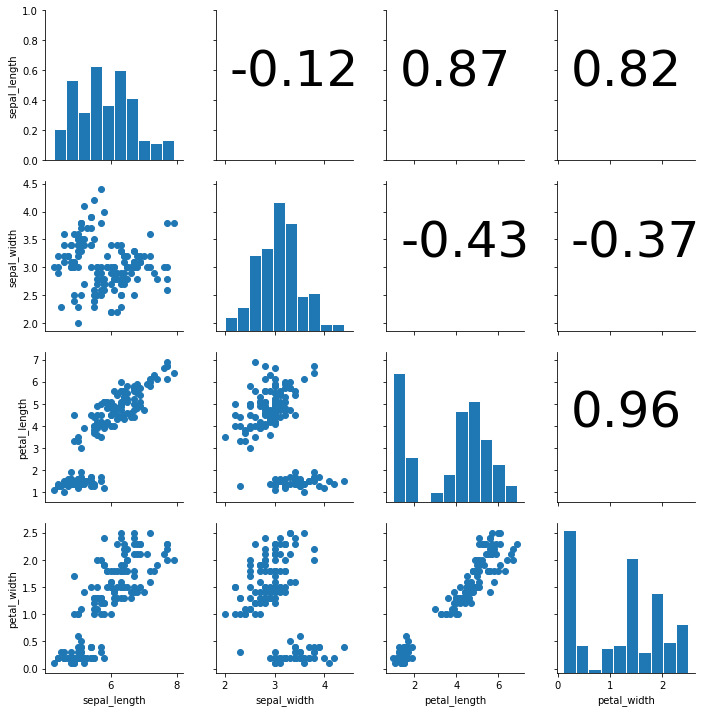

In [23]:
#
g = sns.PairGrid(iris)
g = g.map_lower(plt.scatter)
g = g.map_diag(plt.hist, edgecolor="w")
g = g.map_upper(corrfunc)

## Marginal plot

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


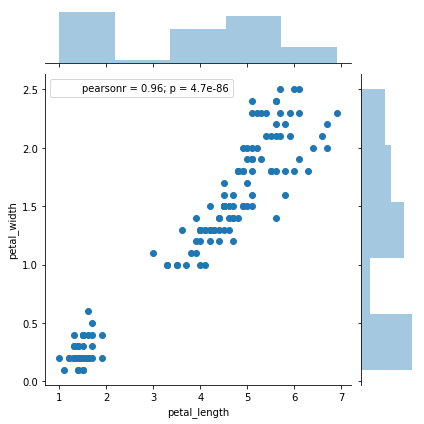

In [24]:
# same basic idea, but show the distribution histograms in the margins.
# The downside is that you can't distinguish classes this way.
sns.jointplot(data=iris, x='petal_length', y='petal_width', kind='scatter')